In [1]:
%matplotlib inline
import pandas as pd
import requests
import json

In [2]:
api_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# API key in config.py which contains: bls_key = 'key'
import config
key = '?registrationkey={}'.format(config.bls_key)

In [3]:
# Store series as dictionary
series_dict = {
    'LNS14000003': 'White', 
    'LNS14000006': 'Black', 
    'LNS14032183': 'Asian',
    'LNS14000009': 'Hispanic'}

# Start year and end year
date_r = (1975, 2023)

# Handle dates
dates = [(str(date_r[0]), str(date_r[1]))]
while int(dates[-1][1]) - int(dates[-1][0]) > 10:
    dates = [(str(date_r[0]), str(date_r[0]+9))]
    d1 = int(dates[-1][0])
    while int(dates[-1][1]) < date_r[1]:
        d1 = d1 + 10
        d2 = min([date_r[1], d1+9])
        dates.append((str(d1),(d2))) 

In [4]:
df = pd.DataFrame()

for start, end in dates:
    # Submit the list of series as data
    data = json.dumps({
        "seriesid": list(series_dict.keys()),
        "startyear": start, "endyear": end})

    # Post request for the data
    p = requests.post(
        '{}{}'.format(api_url, key), 
        headers={'Content-type': 'application/json'}, 
        data=data).json()
    for s in p['Results']['series']:
        col = series_dict[s['seriesID']]
        for r in s['data']:
            date = pd.to_datetime('{} {}'.format(
                r['periodName'], r['year']))
            df.at[date, col] = float(r['value'])
df = df.sort_index()

# Output results
print('Post Request Status: {}'.format(p['status']))
df.tail(15)

Post Request Status: REQUEST_SUCCEEDED


,White,Black,Hispanic,Asian
2022-01-01,3.4,6.9,4.9,3.5
2022-02-01,3.3,6.6,4.5,3.0
2022-03-01,3.2,6.2,4.2,2.8
2022-04-01,3.2,5.9,4.2,3.1
2022-05-01,3.2,6.2,4.4,2.4
2022-06-01,3.3,5.9,4.3,3.0
2022-07-01,3.1,6.0,4.0,2.6
2022-08-01,3.2,6.4,4.5,2.8
2022-09-01,3.1,5.9,3.9,2.5
2022-10-01,3.3,5.9,4.2,2.9


In [11]:
# saving the dataframe
df.to_csv('file1.csv')

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

plt.rc('axes', axisbelow=True)

In [13]:
pd.read_csv('rec_dates.csv')

,peak,trough
0,1/1/1970,12/1/1970
1,11/1/1973,4/1/1975
2,2/1/1980,8/1/1980
3,8/1/1981,12/1/1982
4,8/1/1990,4/1/1991
5,4/1/2001,12/1/2001
6,1/1/2008,7/1/2009


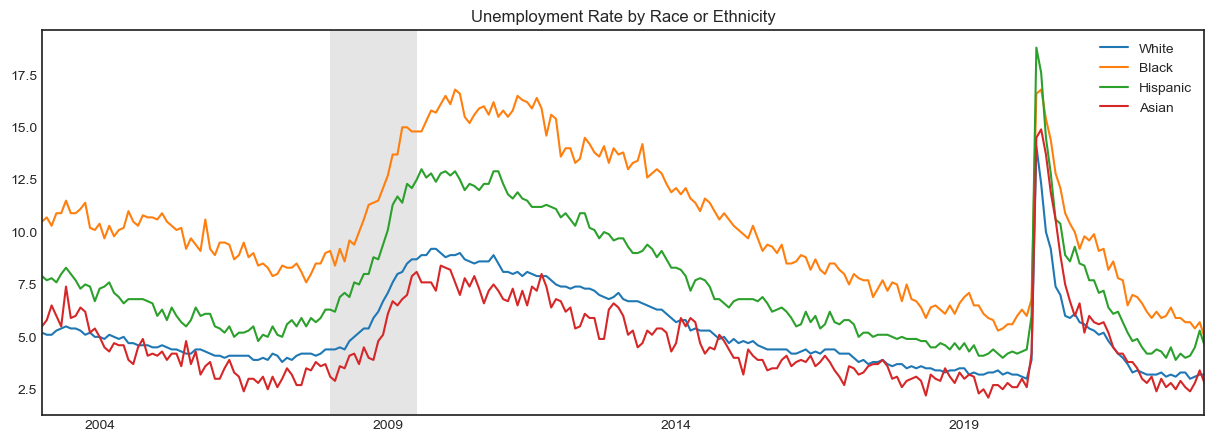

In [14]:
df.dropna().plot(title='Unemployment Rate by Race or Ethnicity', figsize=(15, 5))

# Shaded bars indicating recessions
for i, v in pd.read_csv('rec_dates.csv').dropna().loc[2:].iterrows():
    plt.axvspan(v['peak'], v['trough'], fill=True, 
                linewidth=0, color='gray', alpha=0.2)  